https://gymnasium.farama.org/  
pekiştirmeli öğrenme için örnek çalışmalar

In [13]:
!pip install "numpy<2.0.0"

Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|██████████| 1000/1000 [00:00<00:00, 5255.83it/s]

Qtable After Training: 
[[0.       0.       0.59049  0.      ]
 [0.       0.       0.6561   0.      ]
 [0.       0.729    0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.9      0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.421875 0.      ]
 [0.       0.       1.       0.      ]
 [0.       0.       0.       0.      ]]


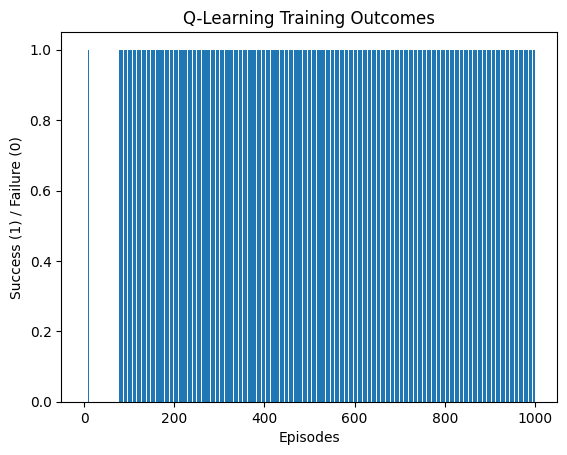

In [14]:
import gym
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

environment = gym.make("FrozenLake-v1", is_slippery = False)
# environment.reset() # No need to call reset here, it's called in the loop

nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable = np.zeros((nb_states, nb_actions))

print("Q-table:")
print(qtable) # ajanin beyni

episodes = 1000 # episode
alpha = 0.5 # learning rate
gamma = 0.9 # discount rate

outcomes = []

# training
for _ in tqdm(range(episodes)):

    reset_output = environment.reset()
    if isinstance(reset_output, tuple):
        state = reset_output[0]
    else:
        state = reset_output

    done = False # ajanin basari durumu
    outcomes.append("Failure")

    while not done: # ajan basarili olana kadar state icerisinde hareket et (action sec ve uygula)

        if isinstance(state, int) and np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()


        # step (hareketi uygula)
        new_state, reward, terminated, truncated, info = environment.step(action)
        done = terminated or truncated


        if isinstance(state, int) and isinstance(new_state, int):
          qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state

        if reward:
            outcomes[-1] = "Success"

environment.close()

print("Qtable After Training: ")
print(qtable)

# görselleştirme
plt.bar(range(episodes), [1 if outcome == "Success" else 0 for outcome in outcomes])
plt.xlabel("Episodes")
plt.ylabel("Success (1) / Failure (0)")
plt.title("Q-Learning Training Outcomes")
plt.show()